In [161]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, \
    PowerTransformer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sns.set()

In [162]:
#import data
#data import done differently to the norm as original data was set up for a Kaggle competition
raw_data = pd.read_csv("train_titanic.csv")
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
#import other datacombining test_data for cleaning
test_data = pd.read_csv("test_titanic.csv")
actual_data = pd.read_csv("gender_submission.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [164]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
#converting all missing rows to NaN
raw_data.replace('', np.NaN)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [166]:
#cleaning
raw_data['Sex'] = raw_data['Sex'].replace('male', 0).replace('female', 1) #females = 1, males = 0
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [167]:
#checking for duplicated data
raw_data.duplicated().value_counts()

False    891
Name: count, dtype: int64

In [168]:
#reducing dimensionality
df = raw_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

Text(0.5, 1.0, 'Age functioned on fare')

<Figure size 3200x2400 with 0 Axes>

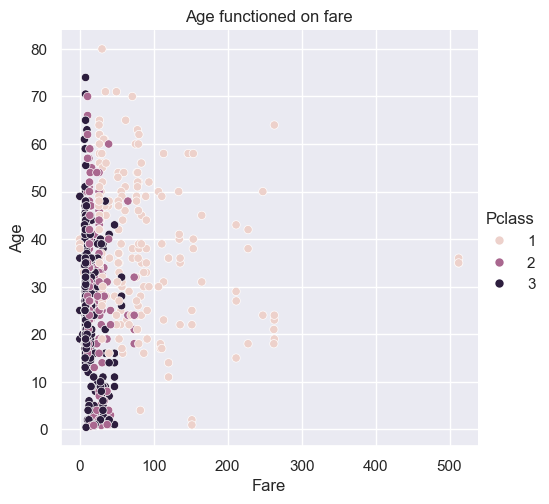

In [169]:
#investigating age
plt.figure(dpi = 500)
sns.relplot(x = "Fare", y = "Age", hue = "Pclass", data = df)
plt.title('Age functioned on fare')


Text(0.5, 1.0, 'Box plot of age distribution')

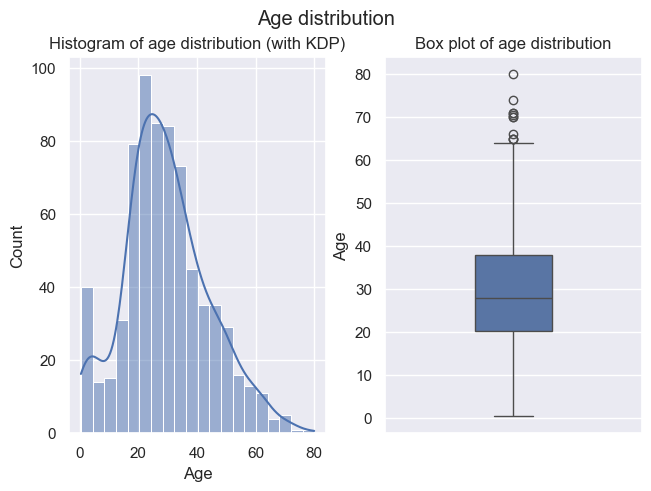

<Figure size 3200x2400 with 0 Axes>

In [170]:
#investigating age
fig, ax = plt.subplots(1,2, layout = "constrained")
fig.suptitle('Age distribution')
sns.histplot(df.Age, kde=True, ax= ax[0])
sns.boxplot(df.Age, ax = ax[1], width= 0.3)
plt.figure(dpi = 500)
ax[0].set_title("Histogram of age distribution (with KDP)")
ax[1].set_title("Box plot of age distribution")

In [171]:
#filling NaN
df["Age"] = df["Age"].fillna(df["Age"].median())

In [172]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [174]:
#investigating if embarked should feature
embark_total = pd.DataFrame(df['Embarked'].value_counts())
embark_survive = df[['Embarked', 'Survived']].groupby('Embarked').sum()
embark_survive['Total'] = embark_total
embark_survive['Surival percentage'] = embark_survive.Survived / embark_survive.Total * 100
embark_survive

,Survived,Total,Surival percentage
Embarked,,,
C,93,168,55.357143
Q,30,77,38.961039
S,219,646,33.900929


Text(0.5, 1.0, 'Box plot of fare distribution')

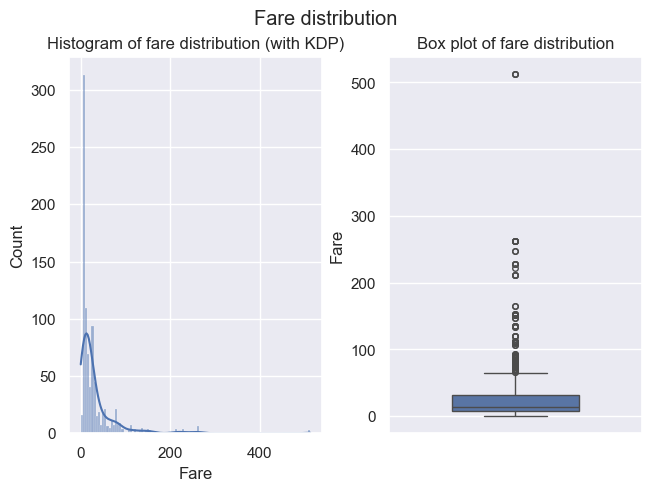

<Figure size 3200x2400 with 0 Axes>

In [175]:
#investigate fare data
df['Fare'] = df['Fare'].round(2) #rounding fare data
fig, ax = plt.subplots(1,2, layout = "constrained")
fig.suptitle('Fare distribution')
plt.figure(dpi = 500)
sns.histplot(df.Fare, ax= ax[0], kde= True)
sns.boxplot(df.Fare, ax = ax[1], fliersize= 4, width = 0.5)
ax[0].set_title("Histogram of fare distribution (with KDP)")
ax[1].set_title("Box plot of fare distribution")

In [176]:
#imputing data for missing fares
fare_describe = df[['Fare','Pclass']].groupby('Pclass').describe()

fare_classes = {"first": fare_describe["Fare"].loc[1,'50%'], \
                "second": fare_describe["Fare"].loc[2,'50%'], \
                "third": fare_describe["Fare"].loc[3,'50%']}

In [177]:
zero_fare = df['Fare'].where( df.Fare == 0).dropna().index
zero_fare_pd = df.iloc[zero_fare]
print(zero_fare_pd) #showing missing values

#imputing mean fare_class values
df.loc[(df['Pclass'] == 1) & (df['Fare'] == 0), 'Fare'] = fare_classes["first"] #comeback and make concise
df.loc[(df['Pclass'] == 2) & (df['Fare'] == 0), 'Fare'] = fare_classes["second"]
df.loc[(df['Pclass'] == 3) & (df['Fare'] == 0), 'Fare'] = fare_classes["third"]

print(df.iloc[zero_fare])

     Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
179         0       3    0  36.0      0      0   0.0        S
263         0       1    0  40.0      0      0   0.0        S
271         1       3    0  25.0      0      0   0.0        S
277         0       2    0  28.0      0      0   0.0        S
302         0       3    0  19.0      0      0   0.0        S
413         0       2    0  28.0      0      0   0.0        S
466         0       2    0  28.0      0      0   0.0        S
481         0       2    0  28.0      0      0   0.0        S
597         0       3    0  49.0      0      0   0.0        S
633         0       1    0  28.0      0      0   0.0        S
674         0       2    0  28.0      0      0   0.0        S
732         0       2    0  28.0      0      0   0.0        S
806         0       1    0  39.0      0      0   0.0        S
815         0       1    0  28.0      0      0   0.0        S
822         0       1    0  38.0      0      0   0.0        S
     Sur

In [178]:
#encoding
label_encoder = LabelEncoder()
df['EmbarkedLabel'] = label_encoder.fit_transform(df.Embarked)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedLabel
0,0,3,0,22.0,1,0,7.25,S,2
1,1,1,1,38.0,1,0,71.28,C,0
2,1,3,1,26.0,0,0,7.92,S,2
3,1,1,1,35.0,1,0,53.10,S,2
4,0,3,0,35.0,0,0,8.05,S,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.00,S,2
887,1,1,1,19.0,0,0,30.00,S,2
888,0,3,1,28.0,1,2,23.45,S,2
889,1,1,0,26.0,0,0,30.00,C,0


In [179]:
#onehot
one_hot = OneHotEncoder()
encoded_embarked = pd.DataFrame(one_hot.fit_transform(df['EmbarkedLabel'].values.reshape(-1,1)).toarray(), 
                                columns= ['S', 'Q', 'C'])
data = pd.concat([df,encoded_embarked], axis = 1)
data = data.drop('EmbarkedLabel', axis = 1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,Q,C
0,0,3,0,22.0,1,0,7.25,S,0.0,0.0,1.0
1,1,1,1,38.0,1,0,71.28,C,1.0,0.0,0.0
2,1,3,1,26.0,0,0,7.92,S,0.0,0.0,1.0
3,1,1,1,35.0,1,0,53.10,S,0.0,0.0,1.0
4,0,3,0,35.0,0,0,8.05,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.00,S,0.0,0.0,1.0
887,1,1,1,19.0,0,0,30.00,S,0.0,0.0,1.0
888,0,3,1,28.0,1,2,23.45,S,0.0,0.0,1.0
889,1,1,0,26.0,0,0,30.00,C,1.0,0.0,0.0


Text(0.5, 1.0, 'Fare')

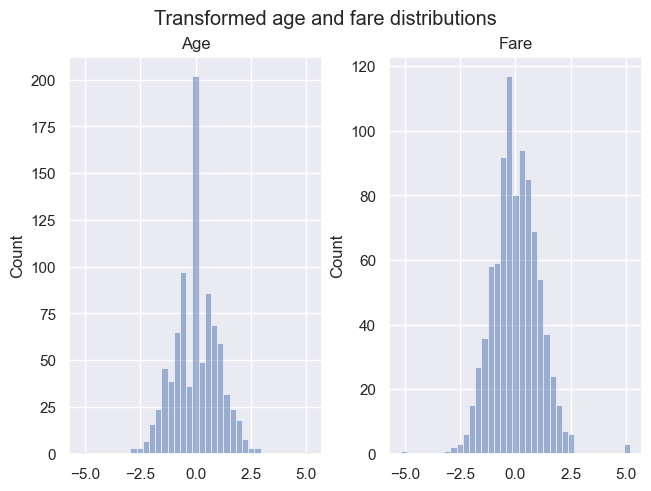

In [194]:
#standardisation and normalisation
scaler = StandardScaler()
quantile_transformer = QuantileTransformer(n_quantiles=300, output_distribution='normal')
power_transformer = PowerTransformer()

age_quantile_transform = quantile_transformer.fit_transform(df.Age.values.reshape(-1,1))
fare_quantile_transform = quantile_transformer.fit_transform(df.Fare.values.reshape(-1,1))

fig, ax = plt.subplots(1,2, layout = 'constrained')
sns.histplot(age_quantile_transform, ax = ax[0], legend = False)
sns.histplot(fare_quantile_transform, ax = ax[1], legend = False)
fig.suptitle("Transformed age and fare distributions")
ax[0].set_title("Age")
ax[1].set_title("Fare")

In [181]:
data['AgeNorm'] = age_quantile_transform
data['FareNorm'] = fare_quantile_transform

In [182]:
#splitting data
x_train = data.drop(['Survived','Fare','Embarked','Age'], axis = 1)
y_train = data['Survived']

In [183]:
#logreg model
logreg = LogisticRegression(random_state = 0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [184]:
#inspecting test data 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [185]:
#applying same cleaning as train set

#combine test_data and actual survival data
test_data = pd.concat([test_data, actual_data], axis = 1)

test_data['Sex'] = test_data['Sex'].replace('male', 0).replace('female', 1) #converting sex to binary
test_data1 = test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #reducing dimensions
test_data1.fillna(df['Age'].median(), inplace = True)

#encoding
test_data1['EmbarkedLabel'] = label_encoder.fit_transform(test_data1.Embarked) #label encoding
#one-hot encoding
encoded_embarked_test = pd.DataFrame(one_hot.fit_transform(test_data1['EmbarkedLabel'].values.reshape(-1,1)).toarray(), 
                                columns= ['S', 'Q', 'C'])
test_data_2 = pd.concat([test_data1,encoded_embarked_test], axis = 1)

#transform
test_data_2['AgeNorm'] = quantile_transformer.fit_transform(test_data_2.Age.values.reshape(-1,1))
test_data_2['FareNorm'] = quantile_transformer.fit_transform(test_data_2.Fare.values.reshape(-1,1))


x_test = test_data_2.drop(['EmbarkedLabel', 'Embarked', 'Age', 'Fare', 'Survived'], axis = 1)
y_test = test_data_2['Survived']


In [186]:
#prediction
y_pred = logreg.predict(x_test)
prediction = pd.DataFrame({"prediction": y_pred, "actual": y_test})
prediction

,prediction,actual
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [187]:
#accuracy
print("accuracy (logistic regression):", metrics.accuracy_score(y_test, y_pred) )
print("score (logistic regression):", logreg.score(x_train, y_train) )

accuracy (logistic regression): 0.9449760765550239
score (logistic regression): 0.8024691358024691


In [195]:
#naive bayes
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_bayes = naive_bayes.predict(x_test)
print("accuracy (naive bayes):", metrics.accuracy_score(y_test, y_pred_bayes))
print("score (naive bayes):", naive_bayes.score(x_train, y_train) )


accuracy (naive bayes): 0.868421052631579
score (naive bayes): 0.7833894500561167


In [189]:
#linear discriminant analysis
linear_discriminant_analysis = LinearDiscriminantAnalysis()
linear_discriminant_analysis.fit(x_train,y_train)
y_pred_lda = linear_discriminant_analysis.predict(x_test)
print("accuracy (linear discriminant analysis):", metrics.accuracy_score(y_test, y_pred_lda))
print("score (linear discriminant analysis):", linear_discriminant_analysis.score(x_train,y_train))

accuracy (linear discriminant analysis): 0.9641148325358851
score (linear discriminant analysis): 0.8002244668911336
